# Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
fc=pd.read_csv('F:/ExcelR workings/Assignments/Random Forests/Fraud_check.csv')

In [3]:
fc.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [4]:
fc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
FC=fc.copy()

In [6]:
## Converting the Taxable income variable
fc["income"]="<=30000"
fc.loc[fc["Taxable.Income"]>30000,"income"]="Good"
fc.loc[fc["Taxable.Income"]<=30000,"income"]="Risky"

In [7]:
## Droping the Taxable income variable
fc.drop(['Taxable.Income'], axis=1, inplace=True)

In [8]:
## Droping the City population which is not that much infulence the data
fc.drop(['City.Population'], axis=1, inplace=True)

In [9]:
#Rename the column names
fc.rename(columns={"Undergrad":"UG",
                      "Marital.Status":"MS",
                      "Work.Experience":"Exp"}, inplace=True)

In [10]:
fc.head()

,UG,MS,Exp,Urban,income
0,NO,Single,10,YES,Good
1,YES,Divorced,18,YES,Good
2,NO,Married,30,YES,Good
3,YES,Single,15,YES,Good
4,NO,Married,28,NO,Good


<AxesSubplot:>

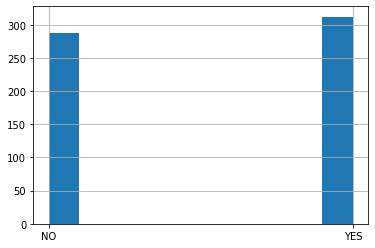

In [11]:
fc['UG'].hist()

<AxesSubplot:>

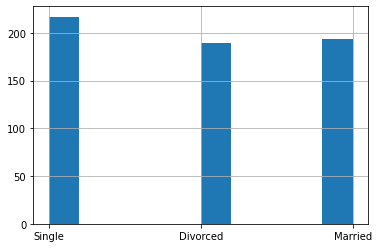

In [12]:
fc['MS'].hist()

<AxesSubplot:>

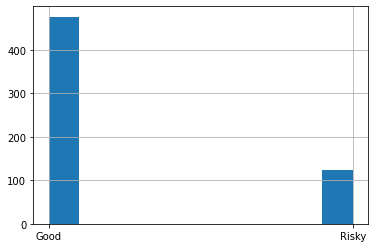

In [13]:
fc['income'].hist()

<AxesSubplot:>

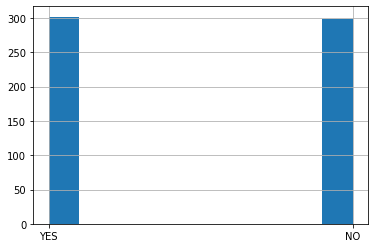

In [14]:
fc['Urban'].hist()

<AxesSubplot:>

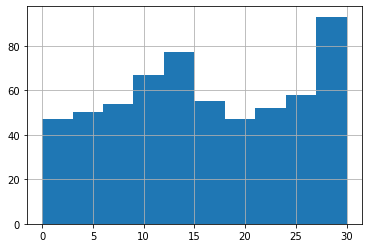

In [15]:
fc['Exp'].hist()

## Encoding the Categorical data

In [17]:
label_encoder=preprocessing.LabelEncoder()
for column_name in fc.columns:
    if fc[column_name].dtype == object:
        fc[column_name] = label_encoder.fit_transform(fc[column_name])
    else:
        pass

In [30]:
fc.head()

,UG,MS,Exp,Urban,income
0,0,2,10,1,0
1,1,0,18,1,0
2,0,1,30,1,0
3,1,2,15,1,0
4,0,1,28,0,0


#### Looking into unique values

In [18]:
fc['UG'].unique()

array([0, 1])

In [19]:
fc['MS'].unique()

array([2, 0, 1])

In [20]:
fc['Urban'].unique()

array([1, 0])

In [21]:
fc['income'].unique()

array([0, 1])

In [22]:
fc['income'].value_counts()

0    476
1    124
Name: income, dtype: int64

In [23]:
##Splitting the data into featuers and labels
x=fc.iloc[:,:4]
y=fc.iloc[:,4]

## Splitting the data into train and test

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=44)

In [25]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((480, 4), (120, 4), (480,), (120,))

## Model building


In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [27]:
model=RandomForestClassifier(n_estimators=5, max_features=2, random_state=44)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.6916666666666667

In [28]:
kfold=KFold(n_splits=8, random_state=44)
results=cross_val_score(model, x, y, cv=kfold)
print(results.mean())

C:\Users\sanjaysagar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.6983333333333334
